## Importing libraries

In [17]:
from datetime import datetime
from keras.optimizers import Adam
from neural_network.src.data_preprocessing import DataPreProcessor
from neural_network.src.cnn_model import CNNModel

## Initialise parameters dataset

In [18]:
train_dir = '../dataset/fer2013/train/'
test_dir = '../dataset/fer2013/test/'

row, col = 48, 48
classes = 7

## Preprocessing the Data

In [19]:
data_processor = DataPreProcessor(images_train_dir=train_dir, images_test_dir=test_dir)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Get data set count training and testing

In [20]:
data_processor.get_train_count

,angry,disgust,fear,happy,neutral,sad,surprise
train,3995,436,4097,7215,4965,4830,3171


In [21]:
data_processor.get_test_count

,angry,disgust,fear,happy,neutral,sad,surprise
test,958,111,1024,1774,1233,1247,831


### Plot number of images in dataset

In [22]:
data_processor.plot_image_count()

## Sample images

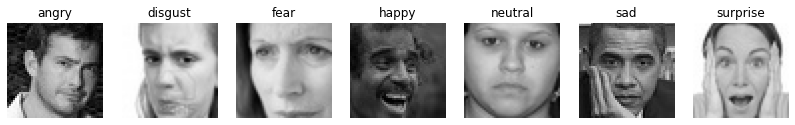

In [23]:
data_processor.plot_sample_images()

### Training Data post Process

In [24]:
training_set = data_processor.get_train_set
training_set

### Test Set post Process

We don't want to modify our images. We simply want to rescale them.

In [25]:
test_set = data_processor.get_test_set
test_set

In [26]:
data_processor.get_emotions_dataset

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Build Model

### Get and Compile Model

In [27]:
opt = Adam(lr=0.0001, decay=10e-6)
cnn_model = CNNModel(optimiser=opt)
cnn_model.compute_model()

### Model Summary

#### Model Summary

In [28]:
cnn_model.get_model_summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 128)      

#### Model Diagram

In [29]:
date = datetime.now()
cnn_model.generate_model_plot(filename=date.strftime('%d-%m-%yT%Hh%Mm%Sd'))

### Train model

In [30]:
# possible to modify steps per epoch and validation steps
cnn_model.train_model(training_set=training_set, test_set=test_set)

Epoch 1/60
  3/448 [..............................] - ETA: 14:50 - loss: 3.8978 - accuracy: 0.1936

KeyboardInterrupt: 

## Results

### Loss and Accuracy plots

In [ ]:
cnn_model.plot_accuracy_and_loss_plotly()

cnn_model.plot_accuracy_and_loss_plt()

### Loss and Accuracy final values

cnn_model.evaluate_model(training_set=training_set, test_set=test_set)

## Making a single Prediction

In [ ]:
cnn_model.predict('dataset/dataset/fer2013/test/PrivateTest_134207.jpg',
                        data_processor.get_emotions_dataset,
                        data_processor.get_emotions_indices)